In [1]:
# Importing the dataset

import pandas as pd
data = pd.read_csv(r'D:/loan-prediction-masterssss/data_year2014/combined/Acquisition_Performance_2014Q1to2014Q4.csv',
                   sep='|',low_memory=False)


print("The number of observations in the acquisition dataset - ", data.shape[0])
#print(data.head())

data["foreclosure_Status"].value_counts()

The number of observations in the acquisition dataset -  1395365


0    1394479
1        886
Name: foreclosure_Status, dtype: int64

In [2]:
# Deleting the missing data with 10% or more missing values

data1 = data
print("Before - Number of records - ",data.shape[0])
print("Before - Number of columns - ",data.shape[1])

data1 = data1.drop(['insurance_percentage','co_borrower_credit_score','mortgage_insurance_type','servicer_name',
                 'foreclosure_date','disposition_date','zip','unit_count','borrower_count'],axis = 1)
print("\n")
print("After - Number of records - ",data1.shape[0])
print("After - Number of columns - ",data1.shape[1])
# data1.dtypes
# print(data1.head(5))

# data1


data1 = data1.fillna(0)
print("It is done")

Before - Number of records -  1395365
Before - Number of columns -  34


After - Number of records -  1395365
After - Number of columns -  25
It is done


In [118]:
# Deleting the correlated columns from the dataset

data2 = data1.drop(['id','balance_y','cltv','loan_term'],axis = 1)
print("Before - Number of records - ",data1.shape[0])
print("Before - Number of columns - ",data1.shape[1])
print("\n")
print("After - Number of records - ",data2.shape[0])
print("After - Number of columns - ",data2.shape[1])
print("\n")
numerical = data2.dtypes[data.dtypes != "object"].index
# print(numerical)

Before - Number of records -  1395365
Before - Number of columns -  25


After - Number of records -  1395365
After - Number of columns -  21




In [ ]:
print(data2.head(5))

In [ ]:
data2.iloc[:,0:20].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

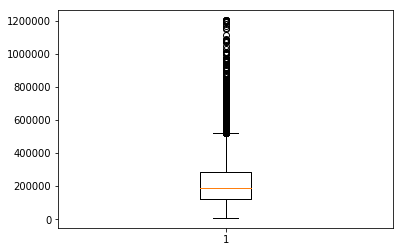

In [4]:
import matplotlib.pylab as plt
plt.boxplot(data2.balance_x)
plt.show()

In [43]:
import pandas as pd
import numpy as np

# data.balance_x.shape[0]
data.balance_x.count()
_,box_plot_results = pd.DataFrame.boxplot(data2.balance_x,return_type='both')
box_plot_results

outliers = [flier.get_ydata() for flier in box_plot_results["fliers"]]
print(outliers)

[array([547000, 570000, 531000, ..., 541000, 618000, 598000], dtype=int64)]


In [132]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# total = data2.count().sort_values(ascending_values=False)
# percent = (((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).sum()/data2.count()*100).sort_values(ascending=False)
# outlier_data = pd.concat([total,percent],axis =1,keys=['Total','Percent'])
# outlier_data.head(8)

Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
(((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2))*100

1.6405026641774734

In [ ]:
data2.info()

In [157]:
numerical = data2.dtypes[data.dtypes != "object"].index
print(numerical)

Index(['interest_rate', 'balance_x', 'ltv', 'dti', 'borrower_credit_score',
       'loan_age', 'foreclosure_Status'],
      dtype='object')


In [143]:
data2.interest_rate = data2.interest_rate.astype(int)
data2.dti = data2.dti.astype(int)
data2.borrower_credit_score = data2.borrower_credit_score.astype(int)

In [175]:
Q1 = data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]].quantile(0.25)
Q3 = data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]].quantile(0.75)

# Q1 = data2.quantile(0.25)
# Q3 = data2.quantile(0.75)
IQR = Q3 - Q1

# print(Q1)
# print("\n")
# print(Q3)
# print("\n")
# print(IQR)

Outlier_percent = ((data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]] < (Q1 - 1.5 * IQR)) 
 | (data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]] > (Q3 + 1.5 * IQR))).sum()/len(data2)*100

Outlier_percent

balance_x                 1.640503
interest_rate            26.583224
ltv                       6.232491
dti                       0.104560
borrower_credit_score     0.060629
loan_age                  7.675626
dtype: float64

In [187]:
Q3.balance_x

283000.0

In [186]:
import numpy as np
# Q1 = data2.balance_x.quantile(0.01)
# Q3 = data2.balance_x.quantile(0.95)

Q1 = data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]].quantile(0.25)
Q3 = data2[["balance_x","interest_rate","ltv","dti","borrower_credit_score","loan_age"]].quantile(0.75)


IQR = Q3 - Q1
# (((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2))*100


def capping_outlier(x):
    if x >= Q3.x:
        return Q3.x
    elif x <= Q1.x:
        return Q1.x
    return x

data2['balance_x_cap']=data2['balance_x'].apply(lambda x: capping_outlier(x))
# data2['ltv_cap']=data2['ltv'].apply(lambda x: capping_outlier(x))
# data2['dti_cap']=data2['dti'].apply(lambda x: capping_outlier(x))
# data2['borrower_credit_score_cap']=data2['borrower_credit_score'].apply(lambda x: capping_outlier(x))
# data2['loan_age_cap']=data2['loan_age'].apply(lambda x: capping_outlier(x))

AttributeError: 'Series' object has no attribute 'x'

In [180]:
data2.iloc[1:5,:]

,channel,seller,interest_rate,balance_x,origination_date,first_payment_date,ltv,dti,borrower_credit_score,first_time_homebuyer,...,occupancy_status,property_state,product_type,relocation_mortgage_indicator,reporting_period,loan_age,maturity_date,delinquency_status,foreclosure_Status,balance_x_cap
1,R,"PNC BANK, N.A.",3,276000,01/2014,03/2014,68,35,742,N,...,P,VT,FRM,N,2017-06-01,40,02/2029,0,0,276000.0
2,R,OTHER,5,190000,02/2014,04/2014,80,31,647,Y,...,P,PA,FRM,N,2017-06-01,39,03/2044,0,0,190000.0
3,C,FREEDOM MORTGAGE CORP.,4,320000,12/2013,02/2014,80,27,774,Y,...,P,TX,FRM,N,2016-01-01,24,01/2044,X,0,320000.0
4,C,OTHER,5,92000,01/2014,03/2014,80,38,820,N,...,I,AZ,FRM,N,2017-06-01,40,02/2044,0,0,92000.0


In [ ]:
def scale_val(s, val):
    percentiles = s.quantile([0.01,0.99]).values
    if val <= percentiles[0]:
        return percentiles[0]
    elif val >= percentiles[1]:
        return percentiles[1]
    else:
        return val
    
df.apply(lambda s: s.apply(lambda v: scale_val(s,v)))

In [153]:
Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
chk = ((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()
print(chk)

159000.0
22891


In [ ]:
Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
outliers_status = ((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR)))
# print(outliers_status)

per_05 = data2.balance_x.quantile(0.05)
per_95 = data2.balance_x.quantile(0.95)
# per_05 #66,000
# per_95 #417,000

out = data2.balance_x[outliers(data2.balance_x)]
to_replace = [out.min(),out.max()]
# print(out.head(5))
print(out.min)
# to_replace #[429000, 1203000]

# test=data2
# test.mask(outliers_status,)

# test = data2
# outliers_status=outliers(data2.balance_x)
# test.mask(outliers_status,replace,axis=1)
# test[outliers_status] = np.nan
# test.fillna(replace(data2.balance_x))



# test=data2[['balance_x']].apply(replace,axis=1)

# df[outliers_low] = np.nan
# df.fillna(down_quantiles, inplace=True)

# df.mask(outliers_low, down_quantiles, axis=1) 

# df.where(~outliers_low, down_quantiles, axis=1)

In [19]:
import numpy as np

def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(0.75)-x.quantile(0.25))

# outliers(data2.balance_x)
# data2.loan_age[outliers(data2.loan_age)].tail()


def replace(x):   # x is a vector
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()],value = [np.percentile(x,5),np.percentile(x,95)])

# data3 = data2
# data3[['balance_x']].apply(replace,axis=1)

# data2[['balance_x']].apply(replace,axis=1)
# data2['balance_x_new']=data['balance_x'].apply(lamda x: replace(x))
# data2['balance_x_new'] = data2[['balance_x']].apply(replace,axis=1)

# data3 = data2[['balance_x']].apply(replace,axis=1)
# df[['A', 'B']] = df[['A', 'B']].apply(np.negative)
# df = df.apply(replace,axis=1)

#  return df.loc[iqr]
# IQR.count()

In [ ]:
outliers(data2.balance_x_new)

In [ ]:
import matplotlib.pylab as plt
plt.boxplot(data2.balance_x)
plt.show()

In [ ]:
plt.boxplot(data2.balance_x_new)
plt.show()

In [ ]:
numerical = data2.dtypes[data.dtypes != "object"].index
print(numerical)



In [74]:
import statistics
balance_x_1 = list(data2['balance_x'])
print('mean: %f' %statistics.mean(balance_x_1))
print('median: %f' %statistics.median(balance_x_1))

# q75,q25 = np.percentile(balance_x_1, [75,25])
# iqr = q75-q25
# print(iqr)
# print ('Proportion of values as outliers: %f percent' 
#        %((len(data2) - len([x for x in balance_x_1 if q75+(1.5*iqr)>=x>=q25-(1,5*iqr)]))*100/float(len(data))))

Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
(((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2))*100

mean: 212991.996359
median: 190000.000000


1.6405026641774734

In [80]:
mean = np.mean([x for x in balance_x_1 if q75+(1.5*iqr)>=x>=q25-(1.5*iqr)])
print('mean:%f' %mean)
upper_whisker = q75+(1.5*iqr)
upper_whisker

mean:206752.812075


521500.0

In [27]:
import numpy as np
Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
(((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2))*100

balance_x_1 = list(data2['balance_x'])
mean = np.mean([x for x in balance_x_1 if Q3+(1.5*IQR)>=x>=Q1-(1.5*IQR)])
print('mean:%f' %mean)

def transform_outlier(x):
    if x > Q3:
        return mean


data2['balance_x_mean']=data2['balance_x'].apply(lambda x: transform_outlier(x))


mean:206752.812075


In [80]:
data2 = data2.drop(['balance_x_mean'],axis = 1)

In [94]:
import numpy as np

# def outliers(x): 
#        return np.abs(x- x.median()) > 1.5*(x.quantile(0.75)-x.quantile(0.25))

# # outliers(data2.balance_x)
# # data2.loan_age[outliers(data2.loan_age)].tail()


# def replace(x):   # x is a vector
#     out = x[outliers(x)]
#     return x.replace(to_replace = [out.min(),out.max()],value = [np.percentile(x,5),np.percentile(x,95)])


import numpy as np
Q1 = data2.balance_x.quantile(0.01)
Q3 = data2.balance_x.quantile(0.95)
IQR = Q3 - Q1
(((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2))*100

balance_x_1 = list(data2['balance_x'])
mean = np.mean([x for x in balance_x_1 if Q3+(1.5*IQR)>=x>=Q1-(1.5*IQR)])
print('mean:%f' %mean)

def transform_outlier(x):
    if x >= Q3:
        return Q3
    elif x <= Q1:
        return Q1
    return x

data2['balance_x_mean']=data2['balance_x'].apply(lambda x: transform_outlier(x))

# def scale_val(s, val):
#     percentiles = s.quantile([0.01,0.99]).values
#     if val <= percentiles[0]:
#         return percentiles[0]
#     elif val >= percentiles[1]:
#         return percentiles[1]
#     else:
#         return val
    
# df.apply(lambda s: s.apply(lambda v: scale_val(s,v)))


mean:212972.825164


In [131]:
import numpy as np
Q1 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
IQR = Q3 - Q1
((data2.balance_x < (Q1 - 1.5 * IQR)) | (data2.balance_x > (Q3 + 1.5 * IQR))).sum()/len(data2)*100




1.6405026641774734

In [74]:
Q1 = data2.balance_x.quantile(0.01)
Q2 = data2.balance_x.quantile(0.25)
Q3 = data2.balance_x.quantile(0.75)
Q4 = data2.balance_x.quantile(0.99)

print(Q1)
print(Q2)
print(Q3)
print(Q4)

44000.0
124000.0
283000.0
567000.0


In [95]:
data2.balance_x[outliers(data2.balance_x)].head()

71     547000
91     570000
165    491000
197    459000
244    531000
Name: balance_x, dtype: int64

In [96]:
data2.balance_x_mean[outliers(data2.balance_x_mean)].head()

Series([], Name: balance_x_mean, dtype: float64)

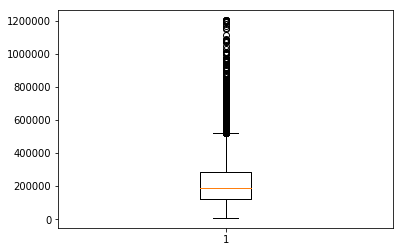

In [97]:
import matplotlib.pylab as plt
plt.boxplot(data2.balance_x)
plt.show()

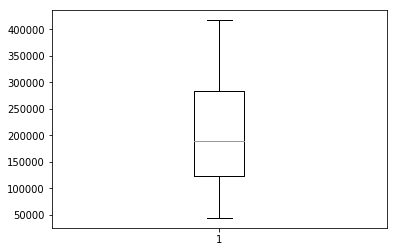

In [116]:
import matplotlib.pylab as plt
plt.boxplot(data2.balance_x_mean)
plt.show()

In [101]:
data2.iloc[1:10:,[3,21]]

,balance_x,balance_x_mean
1,276000,276000.0
2,190000,190000.0
3,320000,320000.0
4,92000,92000.0
5,82000,82000.0
6,184000,184000.0
7,176000,176000.0
8,238000,238000.0
9,231000,231000.0


In [115]:
chk = data2[(data2['balance_x']) != (data2['balance_x_mean'])]
chk.iloc[1:5,[3,21]]

,balance_x,balance_x_mean
14,41000,44000
71,547000,417000
91,570000,417000
165,491000,417000


In [114]:
data2.balance_x_mean = data2.balance_x_mean.astype(int)

In [102]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395365 entries, 0 to 1395364
Data columns (total 22 columns):
channel                          1395365 non-null object
seller                           1395365 non-null object
interest_rate                    1395365 non-null float64
balance_x                        1395365 non-null int64
origination_date                 1395365 non-null object
first_payment_date               1395365 non-null object
ltv                              1395365 non-null int64
dti                              1395365 non-null float64
borrower_credit_score            1395365 non-null float64
first_time_homebuyer             1395365 non-null object
loan_purpose                     1395365 non-null object
property_type                    1395365 non-null object
occupancy_status                 1395365 non-null object
property_state                   1395365 non-null object
product_type                     1395365 non-null object
relocation_mortgage_indicator  

In [65]:
len(data2)

1395365

In [167]:
print(test.head(5))

   balance_x
0     328000
1     276000
2     190000
3     320000
4      92000


In [ ]:
# Remove outliers

mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df[mask] = np.nan

In [163]:
# data3.balance_x[outliers(data3.balance_x)].head()
test[outliers(test)].head()

,balance_x
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [164]:
test.shape

(1395365, 1)

In [157]:
data2.shape

(1395365, 21)

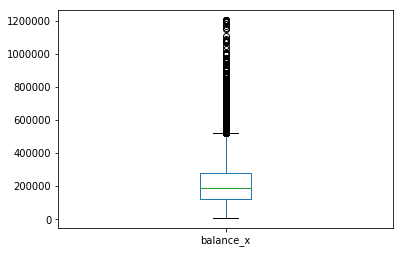

In [165]:
# test.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
test.plot(kind='box')
plt.show()

In [144]:
print(data3.balance_x.head(5))

   balance_x
0     328000
1     276000
2     190000
3     320000
4      92000


In [60]:
def get_subset_by_IQR():
    q1 = data2['balance_x'].quantile(0.25)
    q3 = data2['balance_x'].quantile(0.75)
    iqr = (data2['balance_x'] > q1) & (data2['balance_x'] < q3)
#     return data2.loc[iqr]
    return iqr.count()

# get_subset_by_IQR(data2,balance_x)
get_subset_by_IQR()

1395365

In [124]:
import pandas as pd   # to manipulate dataframes
import numpy as np   # to manipulate arrays
from tqdm import tqdm,trange
from time import sleep

def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

# Give the outliers for the first column for example
# data2.borrower_credit_score[outliers(data2.borrower_credit_score)].tail()
data2.loan_age[outliers(data2.loan_age)].tail()
    
# The function return a boolean vector: True if the element is an outlier. False, otherwise.

1395335    13
1395338     9
1395351     1
1395357    16
1395364     4
Name: loan_age, dtype: int64

In [ ]:
_, box_plot_results = pd.DataFrame.boxplot(data2.loan_age, return_type='both')
# box_plot_results
outliers = [flier.get_ydata() for flier in box_plot_results["fliers"]]
# len(outliers)
print(len(outliers))
print(outliers)
# boxes = [box.get_ydata() for box in bp["boxes"]]
# medians = [median.get_ydata() for median in bp["medians"]]
# whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [ ]:
# Now, to replace the upper and lower outliers, let's write another small function and apply it on all the dataframe:
# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 
def replace(x):   # x is a vector
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()],value = [np.percentile(x,5),np.percentile(x,95)])

# Apply replace() on each column of the dataframe
data3 = data2.iloc[:,1:]
# data3 = data3.apply(replace,axis=1)
# data3.loan_age= data3.loan_age.apply(replace[data3.loan_age],axis=1)
data3[['loan_age']] = data3[['loan_age']].apply(replace,axis=1)
# df[['A', 'B']] = df[['A', 'B']].apply(np.negative)
# df = df.apply(replace,axis=1)
# data3
# data2.loan_age[outliers(data2.loan_age)].tail()
# print worldlists[len(words)]